# Meta Llama 3.1 405B Instruct with baseline prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.1 405B Instruct with baseline prompt.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import baseline_instructions
MODEL_ID = "meta.llama3-1-405b-instruct-v1:0"
SYSTEM_PROMPT = baseline_instructions

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 3
INFO:root:Completed: 4
INFO:root:Completed: 2
INFO:root:Completed: 0
INFO:root:Completed: 1
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 11
INFO:root:Completed: 12
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 15
INFO:root:Completed: 18
INFO:root:Completed: 17
INFO:root:Completed: 19
INFO:root:Completed: 21
INFO:root:Completed: 20
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 24
INFO:root:Completed: 26
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 12s, sys: 4.75 s, total: 1min 16s
Wall time: 35min 42s


[{'0004.91306_cites_88240.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 802,
   'output_tokens': 126,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': 'The passage does not indicate that the case of interest, <targetCase>10 Wall. 68</targetCase>, has been overruled. In fact, it mentions that the grounds of the former decision were reconsidered and declared to be satisfactory, suggesting that the case is still good law. Additionally, the passage cites the case as precedent in a later decision, Huntington v. Texas, 16 Wall. 402, which further supports the conclusion that the case has not been overruled.',
   'raw_results': '\n\n{\n"overruled": "no",\n"confidence": 0.9,\n"rationale": "The passage does not indicate that the case of interest, <targetCase>10 Wall. 68</targetCase>, has been overruled. In fact, it mentions that the grounds of the former decision were reconsidered and declared to be satisfactory, suggesting that the case is still good law. A

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,802,126,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
1,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,803,157,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
2,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,830,167,no,0.9,"The passage mentions the case of interest, <ta...","\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
3,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,1579,177,yes,0.9,The court opinion explicitly states that the p...,"\n\nHere is the analysis of the case:\n\n{\n""o..."
4,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,1291,182,no,0.9,The court opinion mentions the case of interes...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/3.llama/2.llama31_405B_baseline.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

20

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/3.llama/2.llama31_405B_baseline.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,1579,177,yes,0.9,The court opinion explicitly states that the p...,"\n\nHere is the analysis of the case:\n\n{\n""o..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,1291,182,no,0.9,The court opinion mentions the case of interes...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,830,167,no,0.9,"The passage mentions the case of interest, <ta...","\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,802,126,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,803,157,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     884
yes    200
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

2073496

In [15]:
eval_df["output_tokens"].sum()

207453

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.92      0.94       935
         Yes       0.61      0.83      0.70       149

    accuracy                           0.90      1084
   macro avg       0.79      0.87      0.82      1084
weighted avg       0.92      0.90      0.91      1084



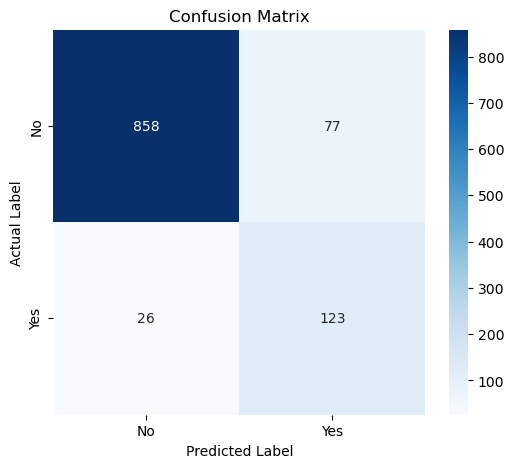

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.61
Recall: 0.83
F-score: 0.70
Specificity: 0.92
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 123
True negatives: 858
False positives: 77
False negatives: 26


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

77

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

26

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,1579,177,yes,0.9,The court opinion explicitly states that the p...,"\n\nHere is the analysis of the case:\n\n{\n""o..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,1291,182,no,0.9,The court opinion mentions the case of interes...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,830,167,no,0.9,"The passage mentions the case of interest, <ta...","\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,802,126,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,803,157,no,0.9,The passage does not indicate that the case of...,"\n\n{\n""overruled"": ""no"",\n""confidence"": 0.9,\..."


In [23]:
eval_df.to_csv("predictions/3.llama/2.llama31_405B_baseline_eval.csv", index=False)